In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import Datasets
dataset = pd.read_csv("diabetes.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
X = dataset.drop("diabetes",axis=1).values
y = dataset.diabetes.values.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
model.score(X_test,y_test)

0.81818181818181823

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train,y_train.ravel())
model.score(X_test,y_test)

0.76623376623376627

In [24]:
from sklearn.model_selection import cross_val_score
cv_scores = []
for i in range(7,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train.ravel(), cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

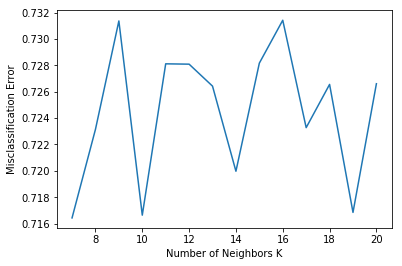

In [29]:
plt.plot(range(7,21), cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()